In [1]:
# Defining imports
import matplotlib.pyplot as plt
import os

In [2]:
save_path = os.path.join(os.getcwd(), "images")
print(save_path)

C:\Users\jatha\PycharmProjects\TEP4100_scripts\assignments\images


In [3]:
# Defining variables
start_temp = 298.15  # [K]
measured_temps_celc = [25, 43, 57, 21, 32, 43, 50]  # [C]
measured_temps = [temp + 273.15 for temp in measured_temps_celc]  # [K]

volume = 0.025  # [m3]

atmospheric_pressure = 100  # [kPa]
start_tire_pressure = 210  # [kPa]
total_start_pressure = atmospheric_pressure + start_tire_pressure  # [kPa]

R = 287  # [(Pa m3) / (kg K)]

In [4]:
def calculate_air_pressure(T_0, T_1, P_0) -> float:
    return P_0 * (T_1 / T_0)


def air_pressure(temps: list[float], start_temp: float, start_pressure: float) -> tuple[list[float], list[float]]:
    """
    Returns a list of calculated air pressures and a list of difference in air pressure
    """
    calculated_air_pressures = [calculate_air_pressure(T_0=start_temp, T_1=temp, P_0=start_pressure) for temp in temps]
    air_pressure_difference = [end_pressure - start_pressure for end_pressure in calculated_air_pressures]
    return calculated_air_pressures, air_pressure_difference


def calculate_mass_release(dP: float, V: float, R: float, T_1: float) -> float:
    return (dP * V) / (R * T_1)

In [5]:
def plot_mass_release() -> None:
    pressures, pressure_differences = air_pressure(measured_temps, start_temp=start_temp,
                                                   start_pressure=start_tire_pressure)
    mass_releases = [calculate_mass_release(dP=dP, V=volume, R=R, T_1=start_temp) for dP in pressure_differences]

    plt.plot(mass_releases, pressure_differences, 'o')

    plt.xlabel("Air release [kg]")
    plt.ylabel("Difference in air pressure [kPa]")

    plt.grid(linestyle=":")
    plt.show()

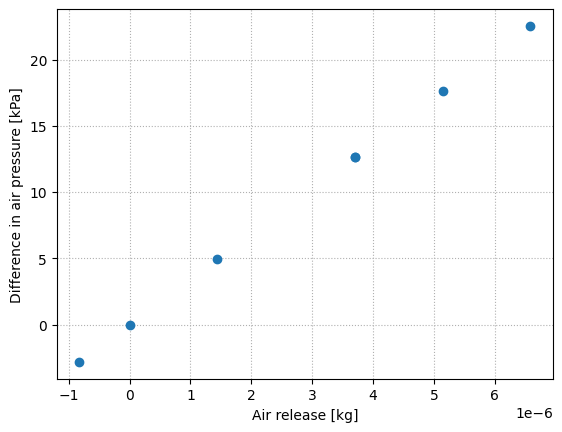

In [6]:
plot_mass_release()